In [2]:
import torch
import cv2
import numpy as np
# print(cv2.getBuildInformation())

In [3]:
bike_model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'bike-detection/fifty-epochs-model/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/harsh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-28 Python-3.10.12 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
helmet_model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'fifty-epochs-helmet-detection/weights/best.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/harsh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-28 Python-3.10.12 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
import cv2

# Load the image
image = cv2.imread("bike-detection/bike-detection-1/test/images/228_jpg.rf.dac05f5f3fc291a0adea9628a9bfc47a.jpg")
image = cv2.resize(image, (640, 640))

# Make predictions using the bike_model
results_bike = bike_model(image)

# Access the predictions for bounding boxes for bike_model
predictions_bike = results_bike.xyxy[0]

# Initialize a copy of the original image for drawing
result_image = image.copy()

# Process and draw bounding boxes for bike_model predictions
for prediction in predictions_bike:
    x_min, y_min, x_max, y_max, confidence, class_label = prediction

    # Convert coordinates to integers
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    # Draw bounding boxes on the result_image for bike detection
    cv2.rectangle(result_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green bounding box

# Make predictions using the helmet_model
results_helmet = helmet_model(image)

# Access the predictions for bounding boxes for helmet_model
predictions_helmet = results_helmet.xyxy[0]

# Process and draw bounding boxes for helmet_model predictions
for prediction in predictions_helmet:
    x_min, y_min, x_max, y_max, confidence, class_label = prediction

    # Convert coordinates to integers
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    # Draw bounding boxes on the result_image for helmet detection
    cv2.rectangle(result_image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)  # Red bounding box

# Display the result_image with bounding boxes for both bike and helmet detection
cv2.imshow('Result Image', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
image = cv2.imread("bike-detection/bike-detection-1/test/images/228_jpg.rf.dac05f5f3fc291a0adea9628a9bfc47a.jpg")
image = cv2.resize(image, (640, 640))
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = bike_model(image)

# cv2.imshow("bike", image)
results2 = helmet_model(image)
cv2.imshow("helmet", image)

print(results)
print(results2)

image 1/1: 640x640 2 bikess
Speed: 1710.5ms pre-process, 83.0ms inference, 22.5ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 1 With Helmet
Speed: 4.1ms pre-process, 20.8ms inference, 5.8ms NMS per image at shape (1, 3, 640, 640)


In [6]:
img = results.render()[0]
# cv2.imshow("imggggg", img)

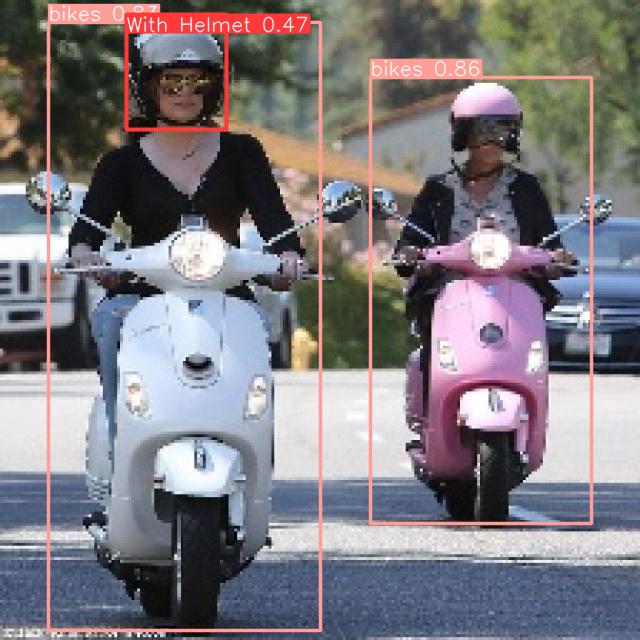

[tensor([[126.88849,  14.62840, 226.48114, 129.29463,   0.47466,   0.00000]], device='cuda:0')]

In [10]:
results2.show() 
results2.xyxy

In [5]:
cap = cv2.VideoCapture('inputs/video/clip.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

In [15]:
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    # print("working")
    cv2.imshow('Frame',frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break

cap.release()
cv2.destroyAllWindows()

In [16]:
cap = cv2.VideoCapture('inputs/video/clip.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

In [12]:
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
 
        # Preprocess the frame (resize, normalize, etc.) to match the bike_model's input requirements

        # Make predictions using the YOLOv5 bike_model
        results = bike_model(frame)

        # Process the results as needed
        # The 'results' variable will contain the bounding boxes, confidence scores, and class labels

        # Display the resulting frame with predictions
        annotated_frame = results.render()[0]
        cv2.imshow('Frame', annotated_frame)
 
        # Press Q on the keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Break the loop
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [9]:
cap = cv2.VideoCapture('inputs/video/clip.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

In [8]:
%timeit

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
 
        # Make predictions using the YOLOv5 bike_model
        frame = cv2.resize(frame, (640,640))
        results = bike_model(frame)

        print(results)
        print("--------------------")

        # Access all predictions
        predictions = results.xyxy[0]  # Access the predictions for the first frame (assuming batch size of 1)

        # `predictions` is now a NumPy array with information about all detected bounding boxes
        # Each row in the array represents a bounding box with columns for [x_min, y_min, x_max, y_max, confidence, class]

        # Process and use the predictions as needed
        for prediction in predictions:
            x_min, y_min, x_max, y_max, confidence, class_label = prediction
            # You can perform actions on each bounding box, such as drawing it on the frame, storing data, etc.

        # Display the resulting frame with all predictions
        annotated_frame = results.render()[0]
        cv2.imshow('Frame', annotated_frame)
 
        # Press Q on the keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Break the loop
    else:
        break

cap.release()
cv2.destroyAllWindows()

image 1/1: 640x640 1 bikes
Speed: 5.8ms pre-process, 145.6ms inference, 6.7ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x640 (no detections)
Speed: 3.9ms pre-process, 59.7ms inference, 3.4ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x640 (no detections)
Speed: 5.2ms pre-process, 73.4ms inference, 4.9ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x640 1 bikes
Speed: 6.8ms pre-process, 41.6ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x640 1 bikes
Speed: 4.5ms pre-process, 70.1ms inference, 9.8ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x640 1 bikes
Speed: 5.9ms pre-process, 61.7ms inference, 8.4ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x640 1 bikes
Speed: 5.2ms pre-process, 72.1ms inference, 9.5ms NMS per image at shape (1, 3, 640, 640)
--------------------
image 1/1: 640x64

In [10]:
import cv2
import threading
import queue


def capture_frames():
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Store the frame in a queue
        frame_queue.put(frame)

cap = cv2.VideoCapture('inputs/video/clip.mp4')
frame_queue = queue.Queue()

# Start a separate thread for frame capture
frame_capture_thread = threading.Thread(target=capture_frames)
frame_capture_thread.start()

while True:
    # Try to get a frame from the queue (non-blocking)
    frame = frame_queue.get()
    if frame is not None:
        # Process the frame (resize, predict, etc.)
        frame = cv2.resize(frame, (640, 640))
        results = bike_model(frame)

        # Access and process predictions as needed
        predictions = results.xyxy[0]
        for prediction in predictions:
            x_min, y_min, x_max, y_max, confidence, class_label = prediction
            # Perform actions on each bounding box

        # Display the resulting frame with all predictions
        annotated_frame = results.render()[0]
        cv2.imshow('Frame', annotated_frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Clean up and release resources
frame_capture_thread.join()
cap.release()
cv2.destroyAllWindows()


In [23]:
import time

frame_rate = 30  # Adjust this to match the frame rate of your video
expected_frame_time = 1.0 / frame_rate

while(cap.isOpened()):
    start_time = time.time()  # Record the start time for processing the current frame

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
 
        # Make predictions using the YOLOv5 bike_model
        frame = cv2.resize(frame, (640, 640))
        results = bike_model(frame)

        # Access all predictions
        predictions = results.xyxy[0]

        # Process and use the predictions as needed
        for prediction in predictions:
            x_min, y_min, x_max, y_max, confidence, class_label = prediction
            # You can perform actions on each bounding box, such as drawing it on the frame, storing data, etc.

        # Display the resulting frame with all predictions
        annotated_frame = results.render()[0]
        cv2.imshow('Frame', annotated_frame)
 
        # Press Q on the keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

        # Calculate the time taken to process the current frame
        frame_processing_time = time.time() - start_time

        # Compare the processing time to the expected frame time
        if frame_processing_time < expected_frame_time:
            # If processing was faster than the expected frame time, add a delay to match the frame rate
            time.sleep(expected_frame_time - frame_processing_time)
 
    # Break the loop
    else:
        break

cap.release()
cv2.destroyAllWindows()


In [6]:

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        # Make predictions using the YOLOv5 bike_model
        frame = cv2.resize(frame, (640, 640))
        results = bike_model(frame)

        # Access all predictions
        predictions = results.xyxy[0]  # Access the predictions for the first frame (assuming batch size of 1)

        # Process and use the predictions as needed
        for prediction in predictions:
            x_min, y_min, x_max, y_max, confidence, class_label = prediction

            # Convert coordinates to integers
            x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

            # Draw a bounding box on the frame
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # You can change the color and thickness

            # You can also put text to label the class and confidence
            label = f"{class_label}: {confidence:.2f}"
            cv2.putText(frame, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the resulting frame with bounding boxes
        cv2.imshow('Frame', frame)

        # Press Q on the keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break

cap.release()
cv2.destroyAllWindows()


In [5]:
import cv2
import threading
import queue

def capture_frames():
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Store the frame in a queue
        frame_queue.put(frame)

cap = cv2.VideoCapture('inputs/video/clip.mp4')
frame_queue = queue.Queue()

# Start a separate thread for frame capture
frame_capture_thread = threading.Thread(target=capture_frames)
frame_capture_thread.start()

while True:
    # Try to get a frame from the queue (non-blocking)
    frame = frame_queue.get()
    if frame is not None:
        # Process the frame (resize, predict, etc.) for bike detection
        frame = cv2.resize(frame, (640, 640))
        results_bike = bike_model(frame)
        print(results_bike)

        # Access and process bike detection predictions as needed
        predictions_bike = results_bike.xyxy[0]
        for prediction in predictions_bike:
            x_min, y_min, x_max, y_max, confidence, class_label = prediction

            # Perform actions on each bounding box, including drawing the label
            label = f"{class_label}: {confidence:.2f}"
            cv2.rectangle(frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
            cv2.putText(frame, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Make predictions using the helmet_model for helmet detection
        results_helmet = helmet_model(frame)
        print(results_helmet)

        print("---------------------------------------------------------------------")

        # Access and process helmet detection predictions as needed
        predictions_helmet = results_helmet.xyxy[0]
        for prediction in predictions_helmet:
            x_min, y_min, x_max, y_max, confidence, class_label = prediction

            # Perform actions on each bounding box, including drawing the label
            label = f"{class_label}: {confidence:.2f}"
            cv2.rectangle(frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 0, 255), 2)
            cv2.putText(frame, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Display the resulting frame with both bike and helmet predictions
        cv2.imshow('Frame', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Clean up and release resources
frame_capture_thread.join()
cap.release()
cv2.destroyAllWindows()


image 1/1: 640x640 1 bikes
Speed: 7.7ms pre-process, 145.1ms inference, 8.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 (no detections)
Speed: 7.0ms pre-process, 90.2ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
---------------------------------------------------------------------
image 1/1: 640x640 (no detections)
Speed: 5.8ms pre-process, 32.7ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 (no detections)
Speed: 5.2ms pre-process, 24.6ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
---------------------------------------------------------------------
image 1/1: 640x640 (no detections)
Speed: 5.2ms pre-process, 41.2ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 (no detections)
Speed: 4.7ms pre-process, 21.7ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
---------------------------------------------------------------------
image 1/1: 640x640 1 bikes
Speed: 2.4ms pre-pro